In [9]:
import pandas as pd
from opentisim.liquidbulk.hydrogen_defaults import *
from opentisim.liquidbulk.hydrogen_objects import *
import opentisim

# basic inputs
startyear = 2020
lifecycle = 10
years = list(range(startyear, startyear + lifecycle))

# define demand scenario
demand = []
for year in years:
    if year < 2025:
        demand.append(2_000_000)
    else:
        demand.append(4_000_000)
scenario_data = {'year': years, 'volume': demand}

# instantiate a commodity objects
opentisim.liquidbulk.commodity_lhydrogen_data['smallhydrogen_perc'] = 50
opentisim.liquidbulk.commodity_lhydrogen_data['largehydrogen_perc'] = 50

# instantiate a commodity objects
lhydrogen = opentisim.liquidbulk.Commodity(**opentisim.liquidbulk.commodity_lhydrogen_data)
lhydrogen.scenario_data = pd.DataFrame(data=scenario_data)

# instantiate vessels
Smallhydrogen = opentisim.liquidbulk.Vessel(**opentisim.liquidbulk.smallhydrogen_data)
Largehydrogen = opentisim.liquidbulk.Vessel(**opentisim.liquidbulk.largehydrogen_data)
Smallammonia = opentisim.liquidbulk.Vessel(**opentisim.liquidbulk.smallammonia_data)
Largeammonia = opentisim.liquidbulk.Vessel(**opentisim.liquidbulk.largeammonia_data)
Handysize = opentisim.liquidbulk.Vessel(**opentisim.liquidbulk.handysize_data)
Panamax = opentisim.liquidbulk.Vessel(**opentisim.liquidbulk.panamax_data)
VLCC = opentisim.liquidbulk.Vessel(**opentisim.liquidbulk.vlcc_data)

vessels = [Smallhydrogen, Largehydrogen, Smallammonia, Largeammonia, Handysize, Panamax, VLCC]

# define terminal
Terminal = opentisim.liquidbulk.System(
    startyear=startyear,
    lifecycle=1,
    elements=[lhydrogen] + vessels,
    operational_hours=16 * 365,
    terminal_supply_chain={'berth_jetty','pipeline_jetty_-_terminal', 'storage', 'mch_2_h2_retrieval'},
    debug=False,
    commodity_type_defaults=opentisim.liquidbulk.commodity_lhydrogen_data,
    storage_type_defaults=opentisim.liquidbulk.storage_lh2_data,
    kendall='E2/E2/n',
    allowable_waiting_service_time_ratio_berth=0.3,
    h2retrieval_type_defaults=opentisim.liquidbulk.h2retrieval_lh2_data)

Terminal.modelframe = list(range(startyear, startyear + lifecycle))
Terminal.revenues = []
Terminal.demurrage = []
# run simulation
for year in years:
    Terminal.startyear = year
    Terminal.simulate()


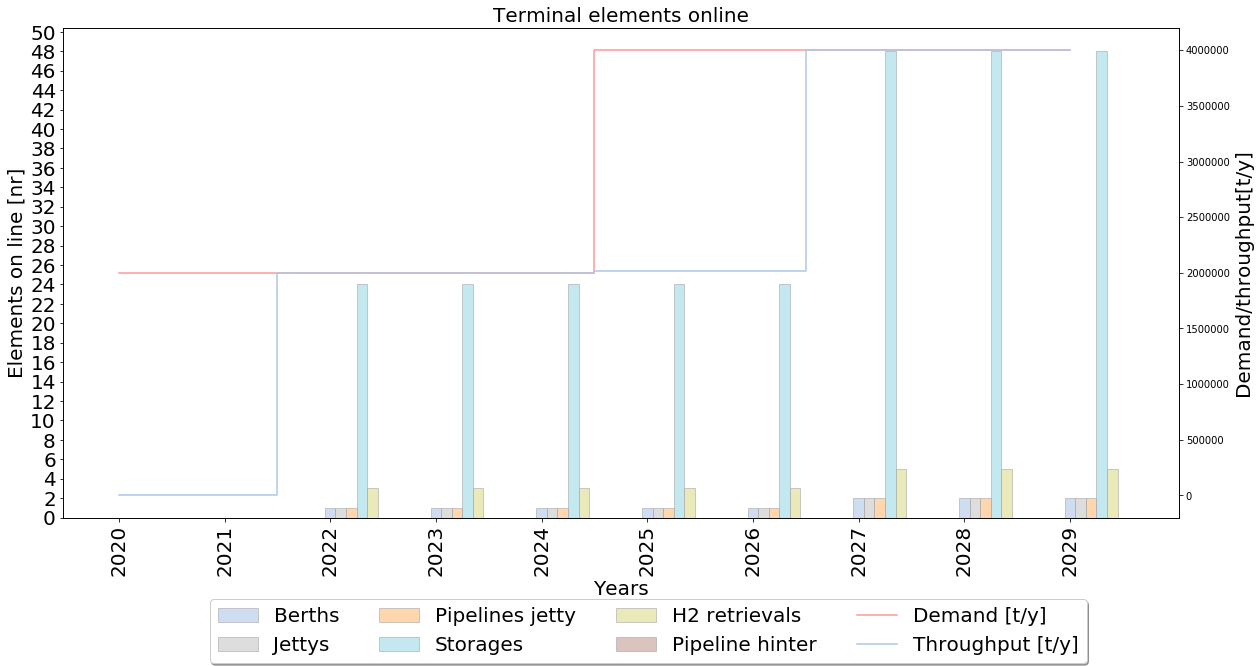

In [10]:
Terminal.terminal_elements_plot()
#plt.savefig('BerthJettyPipePlant.png', bbox_inches = 'tight',dpi=300)

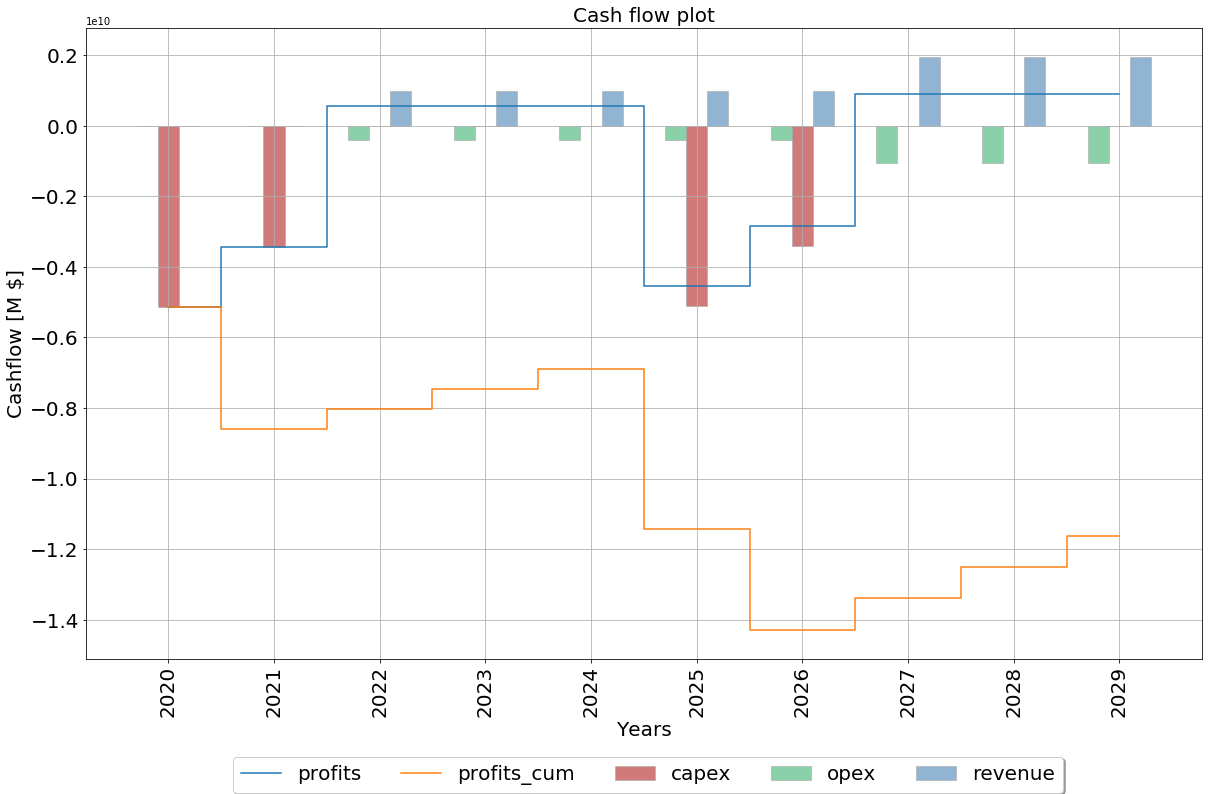

In [11]:
labour = opentisim.liquidbulk.Labour(**opentisim.liquidbulk.labour_data)
cash_flows, cash_flows_WACC_real = opentisim.core.add_cashflow_elements(Terminal, labour)
#print(cash_flows)
opentisim.plot.cashflow_plot(Terminal, cash_flows)